In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [195]:
all_tweets = pd.read_json("random_tweets.json", lines=True)

In [196]:
#print(len(all_tweets))
#print(all_tweets.columns)
print(all_tweets.loc[0]["user"].keys())
#print(all_tweets.loc[0])

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])


In [197]:
for i,j in zip(list(all_tweets.loc[0]["user"].keys()),list(all_tweets.loc[0]["user"].values())):
    print("{}        {}".format(i,str(j)))

id        145388018
id_str        145388018
name        Derek Wolkenhauer
screen_name        derekw221
location        Waterloo, Iowa
description        
url        None
entities        {'description': {'urls': []}}
protected        False
followers_count        215
friends_count        335
listed_count        2
created_at        Tue May 18 21:30:10 +0000 2010
favourites_count        3419
utc_offset        None
time_zone        None
geo_enabled        True
verified        False
statuses_count        4475
lang        en
contributors_enabled        False
is_translator        False
is_translation_enabled        False
profile_background_color        022330
profile_background_image_url        http://abs.twimg.com/images/themes/theme15/bg.png
profile_background_image_url_https        https://abs.twimg.com/images/themes/theme15/bg.png
profile_background_tile        False
profile_image_url        http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg
profile_image_url_https 

In [198]:
all_tweets["is_viral"] = all_tweets["retweet_count"].apply(lambda tweet: 0 if tweet < np.median(all_tweets["retweet_count"]) else 1)
                                                           

In [200]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)
all_tweets['follower_count'] = all_tweets.apply(lambda tweet: tweet['user']["followers_count"], axis = 1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']["friends_count"], axis = 1)
all_tweets['truncated'] = all_tweets["truncated"].replace([False, True], [0, 1])
all_tweets['verified'] = all_tweets.apply(lambda tweet: tweet['user']["verified"], axis = 1)
all_tweets['is_translation_enabled'] = all_tweets.apply(lambda tweet: tweet['user']["is_translation_enabled"], axis = 1)
all_tweets['is_translation_enabled'] = all_tweets["is_translation_enabled"].replace([False, True], [0, 1])
all_tweets['profile_use_background_image'] = all_tweets.apply(lambda tweet: tweet['user']["profile_use_background_image"], axis = 1)
all_tweets['profile_use_background_image'] = all_tweets["profile_use_background_image"].replace([False, True], [0, 1])
all_tweets['default_profile_image'] = all_tweets.apply(lambda tweet: tweet['user']["default_profile_image"], axis = 1)
all_tweets['default_profile_image'] = all_tweets["default_profile_image"].replace([False, True], [0, 1])

In [201]:
all_tweets['profile_use_background_image'].value_counts()

1    8874
0    2225
Name: profile_use_background_image, dtype: int64

In [204]:
labels = all_tweets["is_viral"]
data = all_tweets[['tweet_length','follower_count','friends_count','truncated',"verified",'is_translation_enabled','profile_use_background_image','default_profile_image']]
scaled_data = scale(data,axis = 0)


In [205]:
scaled_data[0]

array([ 0.6164054 , -0.02878298, -0.14483305, -0.41161106, -0.12656924,
       -0.08732677,  0.50073194, -0.17118817])

In [206]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)


In [207]:
scores = []
for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data,train_labels)
    scores.append(classifier.score(test_data, test_labels))

/Users/jordangabriel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jordangabriel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

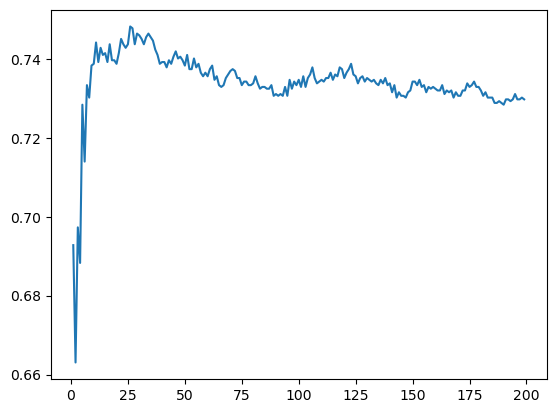

In [208]:
plt.plot(range(1,200) , scores)
plt.show()